In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

# Exercise 1

In [2]:
class Perceptron:
    """
    A simple Rosenblatt Perceptron implementation.
    """

    def __init__(self, n_inputs, learning_rate=0.1):
        """
        Initialise the perceptron.

        Parameters:
        ----------
        n_inputs : int
            Number of input features
        learning_rate : float
            Learning rate (alpha) for weight updates
        """
        self.weights = np.random.uniform(-0.5, 0.5, size=n_inputs)
        self.bias = np.random.uniform(-0.5, 0.5)
        self.learning_rate = learning_rate

    def step_function(self, x):
        """
        Step activation function.

        Returns 1 if x >= 0, else 0.
        """
        return int(x >= 0)

    def predict(self, inputs):
        """
        Compute the perceptron output for given inputs.

        Parameters:
        ----------
        inputs : array-like
            Input values (x1, x2, ...)

        Returns:
        -------
        int : 0 or 1
        """
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)

    def train(self, X, y, epochs, verbose=True):
        """
        Train the perceptron using the perceptron learning rule.

        Parameters:
        ----------
        X : array-like, shape (n_samples, n_features)
            Training inputs
        y : array-like, shape (n_samples,)
            Target outputs (0 or 1)
        epochs : int
            Number of training epochs
        verbose : bool
            If True, print weights after each epoch

        Returns:
        -------
        list : History of (weights, bias) tuples for each epoch
        """
        history = []

        # Store initial weights
        history.append((self.weights.copy(), self.bias))

        for epoch in range(epochs):
            total_error = 0

            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])

                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)

                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            # Store weights after this epoch
            history.append((self.weights.copy(), self.bias))

            if verbose:
                print(
                    f"Epoch {epoch + 1}: weights = {self.weights}, "
                    f"bias = {self.bias:.4f}, errors = {total_error}"
                )

            # Early stopping if no errors
            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break

        return history

## Exercise 2

**AND Truth Table**

| A | B | A AND B |
|---|---|---------|
| 0 | 0 |    0    |
| 0 | 1 |    0    |
| 1 | 0 |    0    |
| 1 | 1 |    1    |

### Exercise 2.1

In [3]:
# Define training data for AND
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_and = np.array([0, 0, 0, 1])
print("AND Training Data:")
print("X:")
print(X_and)
print("y:", y_and)

AND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 0 0 1]


### Exercise 2.2

In [4]:
# Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")
# Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)
# Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i])
    correct = "✓" if prediction == y_and[i] else "✗"
    if prediction != y_and[i]:
        all_correct = False
    print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.12545988  0.45071431]
Initial bias: 0.2319939418114051

Training...

Epoch 1: weights = [-0.12545988  0.35071431], bias = 0.0320, errors = 2
Epoch 2: weights = [-0.02545988  0.35071431], bias = -0.0680, errors = 3
Epoch 3: weights = [-0.02545988  0.25071431], bias = -0.1680, errors = 1
Epoch 4: weights = [0.07454012 0.25071431], bias = -0.1680, errors = 2
Epoch 5: weights = [0.17454012 0.25071431], bias = -0.1680, errors = 2
Epoch 6: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 1
Epoch 7: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 0
Converged after 7 epochs!

Testing AND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 0, Expected: 0 ✓
Input: [1 0] -> Predicted: 0, Expected: 0 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


### Exercise 2.3

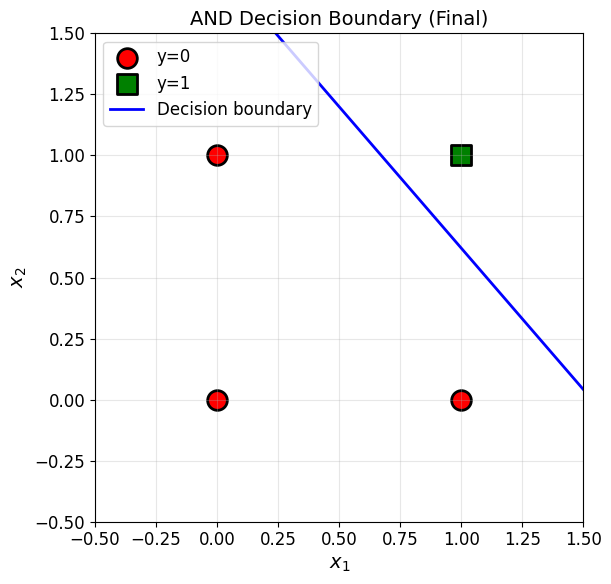

In [5]:
# Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
    """
    Plot data points and decision boundary.

    Parameters:
    ----------
    X : array-like, shape (n_samples, 2)
        Input data points
    y : array-like, shape (n_samples,)
        Labels (0 or 1)
    weights : array-like, shape (2,)
        Perceptron weights [w1, w2]
    bias : float
        Perceptron bias
    title : str
        Plot title
    ax : matplotlib axis (optional)
        Axis to plot on. If None, creates new figure.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))

    # Plot points
    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(
                X[i, 0],
                X[i, 1],
                c="red",
                marker="o",
                s=200,
                edgecolors="black",
                linewidths=2,
                label="y=0" if i == 0 else "",
            )
        else:
            ax.scatter(
                X[i, 0],
                X[i, 1],
                c="green",
                marker="s",
                s=200,
                edgecolors="black",
                linewidths=2,
                label="y=1" if i == 3 else "",
            )

    # Plot decision boundary
    # Line: w1*x1 + w2*x2 + b = 0
    # => x2 = -(w1/w2)*x1 - b/w2
    x1_range = np.linspace(-0.5, 1.5, 100)

    if abs(weights[1]) > 1e-10:  # Avoid division by zero
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, "b-", linewidth=2, label="Decision boundary")
    else:
        # Vertical line case
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color="b", linewidth=2, label="Decision boundary")

    # Formatting
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc="upper left")
    ax.set_aspect("equal")
    return ax

# Test the plotting function with the trained AND perceptron
plot_decision_boundary(
    X_and,
    y_and,
    perceptron_and.weights,
    perceptron_and.bias,
    "AND Decision Boundary (Final)",
)
plt.tight_layout()
plt.show()

### Exercise 2.4

AND - Decision Boundary Evolution:


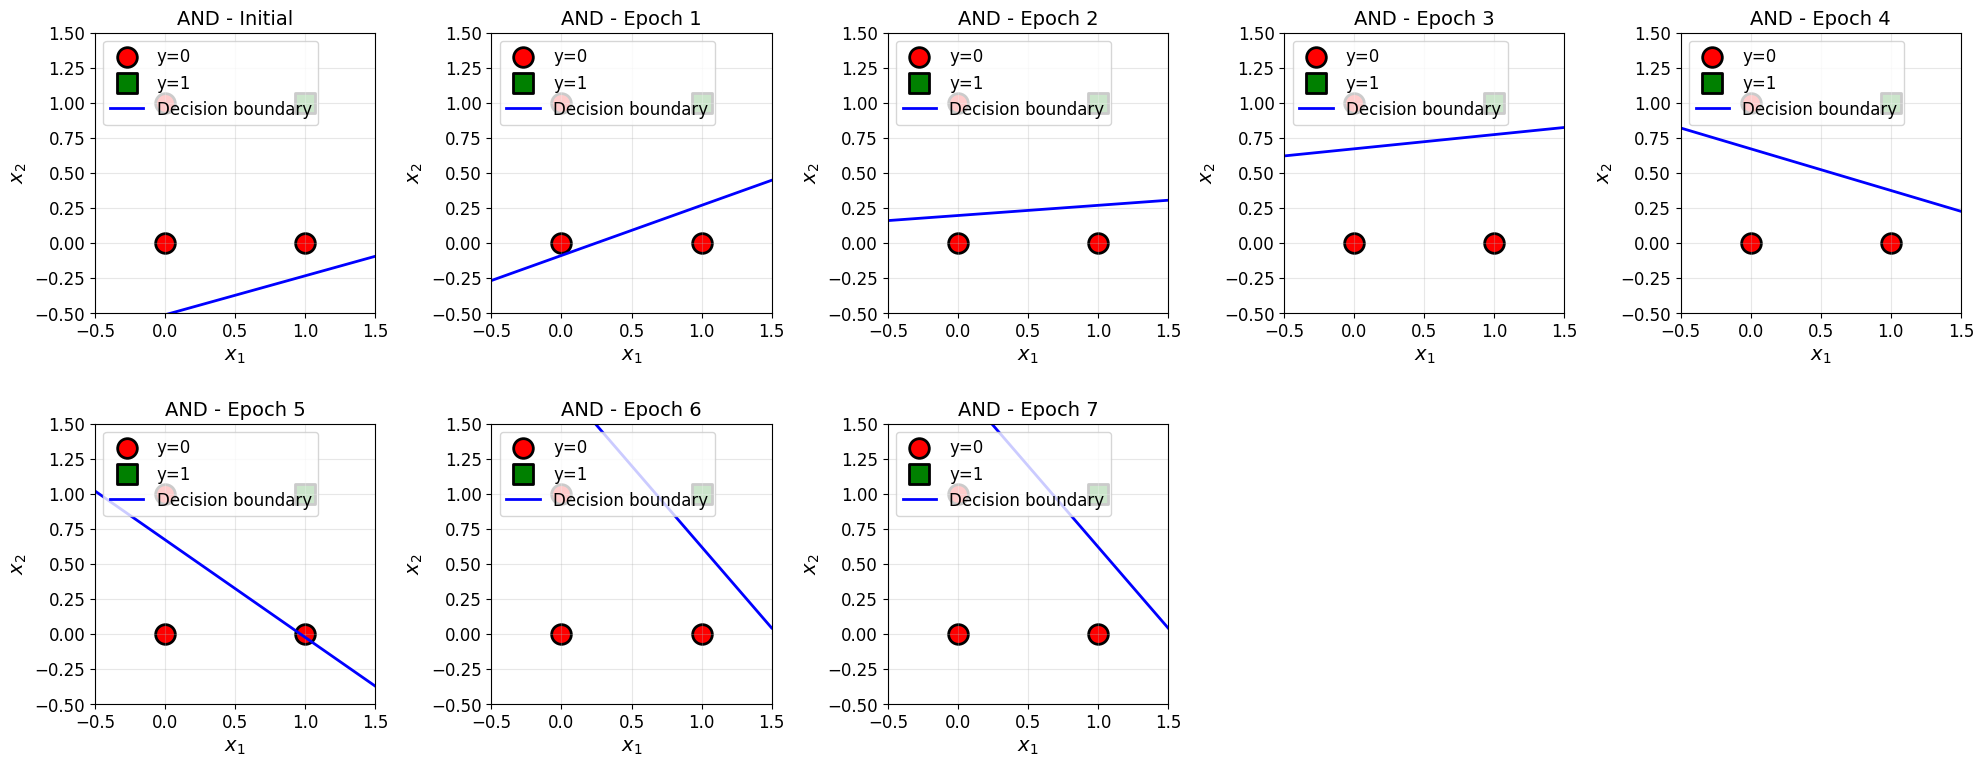

In [6]:
# Visualise decision boundary evolution across epochs
def plot_training_evolution(X, y, history, title_prefix=""):
    """
    Plot decision boundary evolution across training epochs.
    """
    n_epochs = len(history)

    # Determine grid size
    n_cols = min(5, n_epochs)
    n_rows = (n_epochs + n_cols - 1) // n_cols

    _, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    for idx, (weights, bias) in enumerate(history):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]

        epoch_label = "Initial" if idx == 0 else f"Epoch {idx}"
        plot_decision_boundary(X, y, weights, bias, f"{title_prefix}{epoch_label}", ax=ax)

    # Hide empty subplots
    for idx in range(n_epochs, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()

# Plot AND training evolution
print("AND - Decision Boundary Evolution:")
plot_training_evolution(X_and, y_and, history_and, "AND - ")

### Exercise 2.5

In [7]:
import pandas as pd

def create_weight_table(history):
    """
    Create a pandas DataFrame showing weights at each epoch.
    """
    data = {
        "Epoch": [],
        "Weights (w1, w2)": [],
        "Bias": [],
    }

    for epoch, (weights, bias) in enumerate(history):
        label = "Initial" if epoch == 0 else epoch
        data["Epoch"].append(label)
        data["Weights (w1, w2)"].append(f"({weights[0]:.4f}, {weights[1]:.4f})")
        data["Bias"].append(f"{bias:.4f}")

    return pd.DataFrame(data)

print("AND - Weight History Table:")
df_and = create_weight_table(history_and)
display(df_and)

AND - Weight History Table:


,Epoch,"Weights (w1, w2)",Bias
0,Initial,"(-0.1255, 0.4507)",0.2320
1,1,"(-0.1255, 0.3507)",0.0320
2,2,"(-0.0255, 0.3507)",-0.0680
3,3,"(-0.0255, 0.2507)",-0.1680
4,4,"(0.0745, 0.2507)",-0.1680
5,5,"(0.1745, 0.2507)",-0.1680
6,6,"(0.1745, 0.1507)",-0.2680
7,7,"(0.1745, 0.1507)",-0.2680


## Exercise 3

### Exercise 3.1

OR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 1]
Initial weights: [-0.12545988  0.45071431]
Initial bias: 0.2319939418114051
Training...
Epoch 1: weights = [-0.12545988  0.45071431], bias = 0.1320, errors = 1
Epoch 2: weights = [-0.02545988  0.45071431], bias = 0.1320, errors = 2
Epoch 3: weights = [-0.02545988  0.45071431], bias = 0.0320, errors = 1
Epoch 4: weights = [0.07454012 0.45071431], bias = 0.0320, errors = 2
Epoch 5: weights = [0.07454012 0.45071431], bias = -0.0680, errors = 1
Epoch 6: weights = [0.07454012 0.45071431], bias = -0.0680, errors = 0
Converged after 6 epochs!
Testing OR perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 1, Expected: 1 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True
OR - Weight History Table:


,Epoch,"Weights (w1, w2)",Bias
0,Initial,"(-0.1255, 0.4507)",0.2320
1,1,"(-0.1255, 0.4507)",0.1320
2,2,"(-0.0255, 0.4507)",0.1320
3,3,"(-0.0255, 0.4507)",0.0320
4,4,"(0.0745, 0.4507)",0.0320
5,5,"(0.0745, 0.4507)",-0.0680
6,6,"(0.0745, 0.4507)",-0.0680


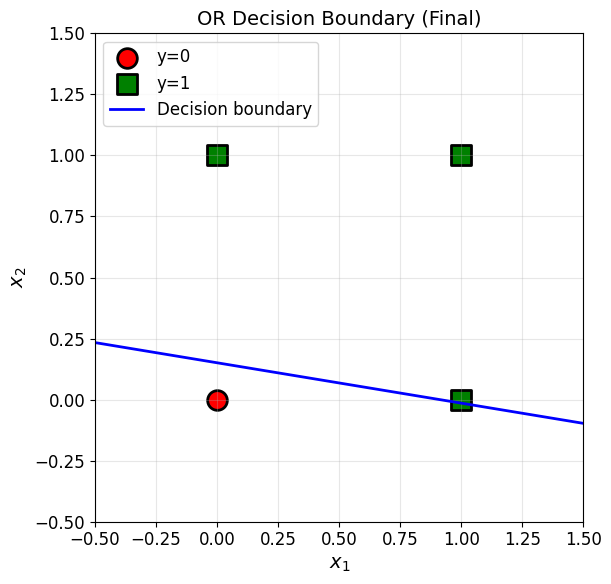

In [8]:
# Exercise 3.1 - OR operation
X_or = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y_or = np.array([0, 1, 1, 1])
print("OR Training Data:")
print("X:")
print(X_or)
print("y:", y_or)

# Create and train perceptron
np.random.seed(42)
perceptron_or = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_or.weights)
print("Initial bias:", perceptron_or.bias)
print("Training...")
history_or = perceptron_or.train(X_or, y_or, epochs=10)

# Test on all inputs
print("Testing OR perceptron:")
print("-" * 40)
all_correct_or = True
for i in range(len(X_or)):
    prediction = perceptron_or.predict(X_or[i])
    correct = "✓" if prediction == y_or[i] else "✗"
    if prediction != y_or[i]:
        all_correct_or = False
    print(f"Input: {X_or[i]} -> Predicted: {prediction}, Expected: {y_or[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct_or}")

# Weight history table (Task 3.2)
print("OR - Weight History Table:")
df_or = create_weight_table(history_or)
display(df_or)

# Visualise decision boundary (Task 3.2)
plot_decision_boundary(
    X_or,
    y_or,
    perceptron_or.weights,
    perceptron_or.bias,
    "OR Decision Boundary (Final)",
)
plt.tight_layout()
plt.show()

### Task 3.2

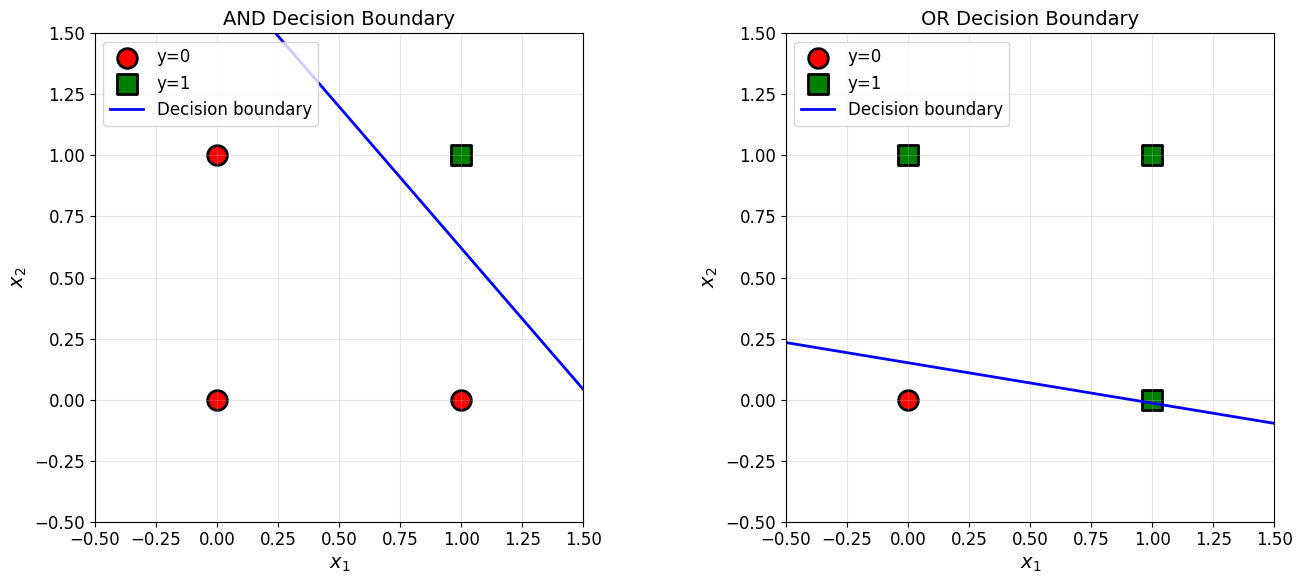

Discussion:-----------------------------------------------------------
AND: The decision boundary separates (1,1) from the other three points.
The line passes 'above' most points, classifying only the top-right as 1.
OR:  The decision boundary separates (0,0) from the other three points.
The line passes 'below' most points, classifying only the origin as 0.
Both are solvable because in each case, the two classes can be separated
by a single straight line - they are LINEARLY SEPARABLE


In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plot_decision_boundary(
    X_and,
    y_and,
    perceptron_and.weights,
    perceptron_and.bias,
    "AND Decision Boundary",
    ax=ax1,
 )
plot_decision_boundary(
    X_or,
    y_or,
    perceptron_or.weights,
    perceptron_or.bias,
    "OR Decision Boundary",
    ax=ax2,
 )

plt.tight_layout()
plt.show()

# Discussion
print("Discussion:-----------------------------------------------------------")
print("AND: The decision boundary separates (1,1) from the other three points.")
print("The line passes 'above' most points, classifying only the top-right as 1.")
print("OR:  The decision boundary separates (0,0) from the other three points.")
print("The line passes 'below' most points, classifying only the origin as 0.")
print("Both are solvable because in each case, the two classes can be separated")
print("by a single straight line - they are LINEARLY SEPARABLE")

## Exercise 4

### Exercise 4.1

In [10]:
# Exercise 4.1 - XOR training data
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y_xor = np.array([0, 1, 1, 0])
print("XOR Training Data:")
print("X:")
print(X_xor)
print("y:", y_xor)

XOR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 0]


### Exercise 4.1.2

In [11]:
# Exercise 4.1.2 - XOR perceptron training attempt
print("Attempting to train perceptron for XOR...")
print("(Using 100 epochs to demonstrate non-convergence)")
np.random.seed(42)
perceptron_xor = Perceptron(n_inputs=2, learning_rate=0.1)
history_xor = perceptron_xor.train(X_xor, y_xor, epochs=100, verbose=False)
print("Training completed after 100 epochs.")
print(f"Final weights: {perceptron_xor.weights}")
print(f"Final bias: {perceptron_xor.bias:.4f}")

Attempting to train perceptron for XOR...
(Using 100 epochs to demonstrate non-convergence)
Training completed after 100 epochs.
Final weights: [-0.22545988  0.05071431]
Final bias: 0.0320


### Exercise 4.1.3

In [12]:
# Exercise 4.1.3 - XOR perceptron test
print("esting XOR perceptron (single layer):")
print("-" * 39)
correct_count = 0
for i in range(len(X_xor)):
    prediction = perceptron_xor.predict(X_xor[i])
    correct = "✓" if prediction == y_xor[i] else "✗"
    if prediction == y_xor[i]:
        correct_count += 1
    print(f"XOR({X_xor[i][0]}, {X_xor[i][1]}) -> Predicted: {prediction}, Expected: {y_xor[i]} {correct}")
print("-" * 39)
accuracy = correct_count / len(X_xor) * 100
print(f"Accuracy: {correct_count}/{len(X_xor)} = {accuracy:.1f}%")
print("⚠️")
print("  The perceptron CANNOT learn XOR with a single layer!")
print("")

esting XOR perceptron (single layer):
---------------------------------------
XOR(0, 0) -> Predicted: 1, Expected: 0 ✗
XOR(0, 1) -> Predicted: 1, Expected: 1 ✓
XOR(1, 0) -> Predicted: 0, Expected: 1 ✗
XOR(1, 1) -> Predicted: 0, Expected: 0 ✓
---------------------------------------
Accuracy: 2/4 = 50.0%
⚠️
  The perceptron CANNOT learn XOR with a single layer!



### Exercise 4.2

Key Insight: It is impossible to draw a single straight line that separates:
(0,0) and (1,1) -> output 0
(0,1) and (1,0) -> output 1
This is the definition of linear inseparability.


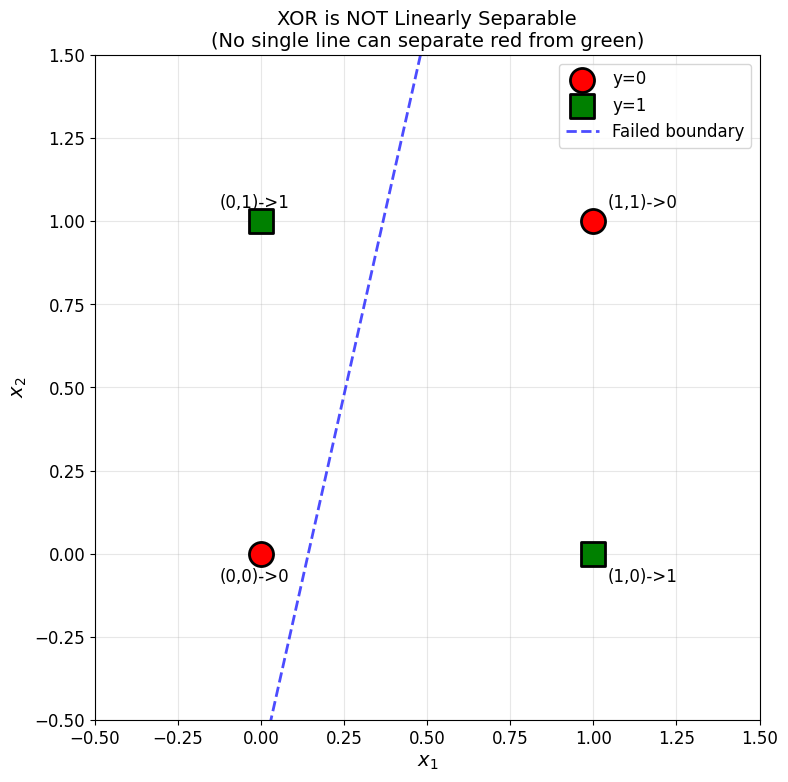

In [13]:
# Exercise 4.2 - XOR linear inseparability
print("Key Insight: It is impossible to draw a single straight line that separates:")
print("(0,0) and (1,1) -> output 0")
print("(0,1) and (1,0) -> output 1")
print("This is the definition of linear inseparability.")

# Visualise XOR data points and a failed straight-line boundary
fig, ax = plt.subplots(figsize=(8, 8))

# Plot points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(
            X_xor[i, 0],
            X_xor[i, 1],
            c="red",
            marker="o",
            s=300,
            edgecolors="black",
            linewidths=2,
            zorder=5,
            label="y=0" if i == 0 else "",
        )
    else:
        ax.scatter(
            X_xor[i, 0],
            X_xor[i, 1],
            c="green",
            marker="s",
            s=300,
            edgecolors="black",
            linewidths=2,
            zorder=5,
            label="y=1" if i == 1 else "",
        )

# Add labels to points
ax.annotate("(0,0)->0", (0, 0), textcoords="offset points", xytext=(-30, -20), fontsize=12)
ax.annotate("(0,1)->1", (0, 1), textcoords="offset points", xytext=(-30, 10), fontsize=12)
ax.annotate("(1,0)->1", (1, 0), textcoords="offset points", xytext=(10, -20), fontsize=12)
ax.annotate("(1,1)->0", (1, 1), textcoords="offset points", xytext=(10, 10), fontsize=12)

# Plot a straight line from the trained XOR perceptron (will not separate correctly)
x1_range = np.linspace(-0.5, 1.5, 100)
if abs(perceptron_xor.weights[1]) > 1e-10:
    x2_boundary = -(perceptron_xor.weights[0] / perceptron_xor.weights[1]) * x1_range - (
        perceptron_xor.bias / perceptron_xor.weights[1]
    )
    ax.plot(x1_range, x2_boundary, "b--", linewidth=2, alpha=0.7, label="Failed boundary")

# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("XOR is NOT Linearly Separable\n(No single line can separate red from green)", fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right")
ax.set_aspect("equal")
plt.tight_layout()
plt.show()

### Exercise 4.2

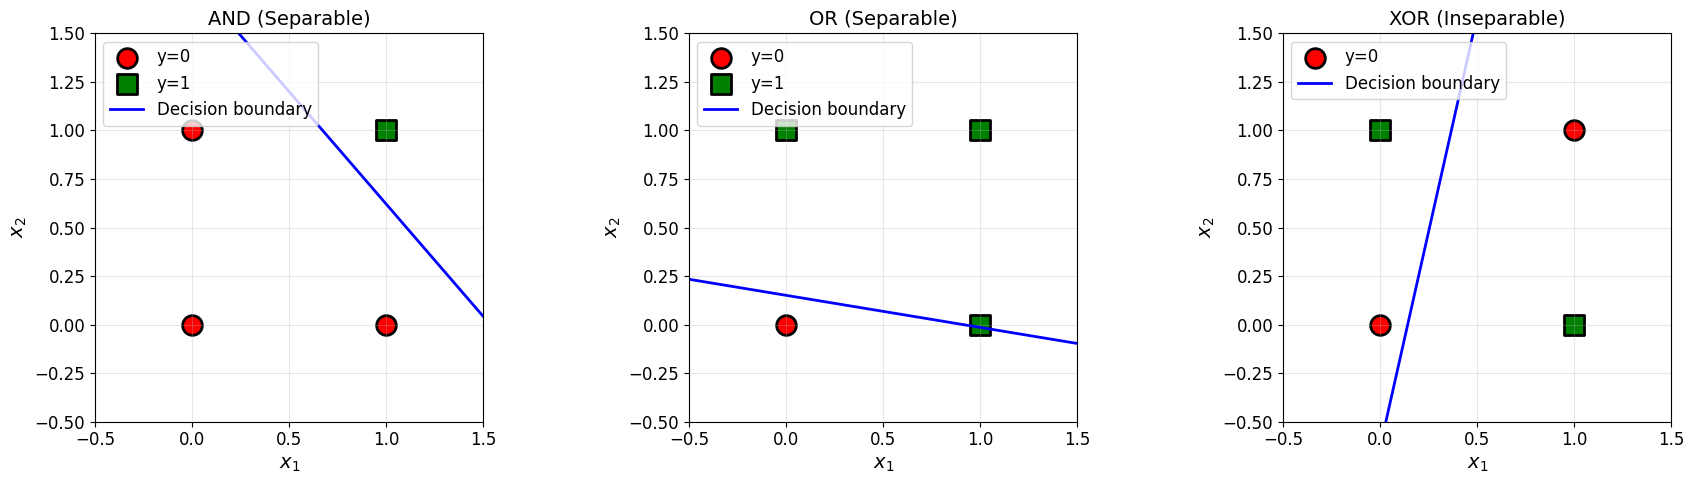

Figure saved as 'linear_separability_comparison.png'


In [14]:
# Create 3-panel comparison figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
plot_decision_boundary(
    X_and,
    y_and,
    perceptron_and.weights,
    perceptron_and.bias,
    "AND (Separable)",
    ax=ax1,
 )
plot_decision_boundary(
    X_or,
    y_or,
    perceptron_or.weights,
    perceptron_or.bias,
    "OR (Separable)",
    ax=ax2,
 )
plot_decision_boundary(
    X_xor,
    y_xor,
    perceptron_xor.weights,
    perceptron_xor.bias,
    "XOR (Inseparable)",
    ax=ax3,
 )
plt.tight_layout()

plt.savefig("linear_separability_comparison.png", dpi=150, bbox_inches="tight")
plt.show()
print("Figure saved as 'linear_separability_comparison.png'")

## Exercise 5

### Exercise 5.1

In [15]:
# Two-layer perceptron with pre-defined weights
def xor_two_layer_manual(x1, x2, verbose=False):
    """
    Compute XOR using a two-layer perceptron with pre-defined weights.

    Architecture based on lecture slides (slide 45):
    - Hidden neuron 1: fires when at most one input is 1 (-x1 - x2 + 1.5 >= 0)
    - Hidden neuron 2: fires when at least one input is 1 (x1 + x2 >= 0.5)
    - Output neuron: h1 AND h2 (both hidden neurons must fire)
    """
    step = lambda x: 1 if x >= 0 else 0

    # Hidden layer (from slides)
    h1_sum = x1 * (-1) + x2 * (-1) + 1.5
    h1 = step(h1_sum)
    h2_sum = x1 * 1 + x2 * 1 - 0.5
    h2 = step(h2_sum)

    # Output layer
    y_sum = h1 * 1 + h2 * 1 - 1.5
    y = step(y_sum)

    if verbose:
        print(f"Input: ({x1}, {x2})")
        print(f"Hidden 1: {x1}*(-1) + {x2}*(-1) + 1.5 = {h1_sum:.1f} -> h1 = {h1}")
        print(f"Hidden 2: {x1}*1 + {x2}*1 - 0.5 = {h2_sum:.1f} -> h2 = {h2}")
        print(f"Output:   {h1}*1 + {h2}*1 - 1.5 = {y_sum:.1f} -> y = {y}")

    return y

# Test
print("Testing two-layer perceptron for XOR (manual weights):")
print("=" * 60)
all_correct = True
for x1 in [0, 1]:
    for x2 in [0, 1]:
        result = xor_two_layer_manual(x1, x2, verbose=True)
        expected = x1 ^ x2
        correct = "✓" if result == expected else "✗"
        if result != expected:
            all_correct = False
        print(f"Result: XOR({x1}, {x2}) = {result}, Expected: {expected} {correct}")
print("=" * 60)
print(f"All predictions correct: {all_correct}")

Testing two-layer perceptron for XOR (manual weights):
Input: (0, 0)
Hidden 1: 0*(-1) + 0*(-1) + 1.5 = 1.5 -> h1 = 1
Hidden 2: 0*1 + 0*1 - 0.5 = -0.5 -> h2 = 0
Output:   1*1 + 0*1 - 1.5 = -0.5 -> y = 0
Result: XOR(0, 0) = 0, Expected: 0 ✓
Input: (0, 1)
Hidden 1: 0*(-1) + 1*(-1) + 1.5 = 0.5 -> h1 = 1
Hidden 2: 0*1 + 1*1 - 0.5 = 0.5 -> h2 = 1
Output:   1*1 + 1*1 - 1.5 = 0.5 -> y = 1
Result: XOR(0, 1) = 1, Expected: 1 ✓
Input: (1, 0)
Hidden 1: 1*(-1) + 0*(-1) + 1.5 = 0.5 -> h1 = 1
Hidden 2: 1*1 + 0*1 - 0.5 = 0.5 -> h2 = 1
Output:   1*1 + 1*1 - 1.5 = 0.5 -> y = 1
Result: XOR(1, 0) = 1, Expected: 1 ✓
Input: (1, 1)
Hidden 1: 1*(-1) + 1*(-1) + 1.5 = -0.5 -> h1 = 0
Hidden 2: 1*1 + 1*1 - 0.5 = 1.5 -> h2 = 1
Output:   0*1 + 1*1 - 1.5 = -0.5 -> y = 0
Result: XOR(1, 1) = 0, Expected: 0 ✓
All predictions correct: True


### Task 5.2

Key Insight: The two lines divide the input space into three regions:
1. Below both lines (only h2 activates)
2. Between the lines (both h1 and h2 activate)
3. Above both lines (only h1 activates)
The output neuron then selects the region(s) where XOR should output 1.


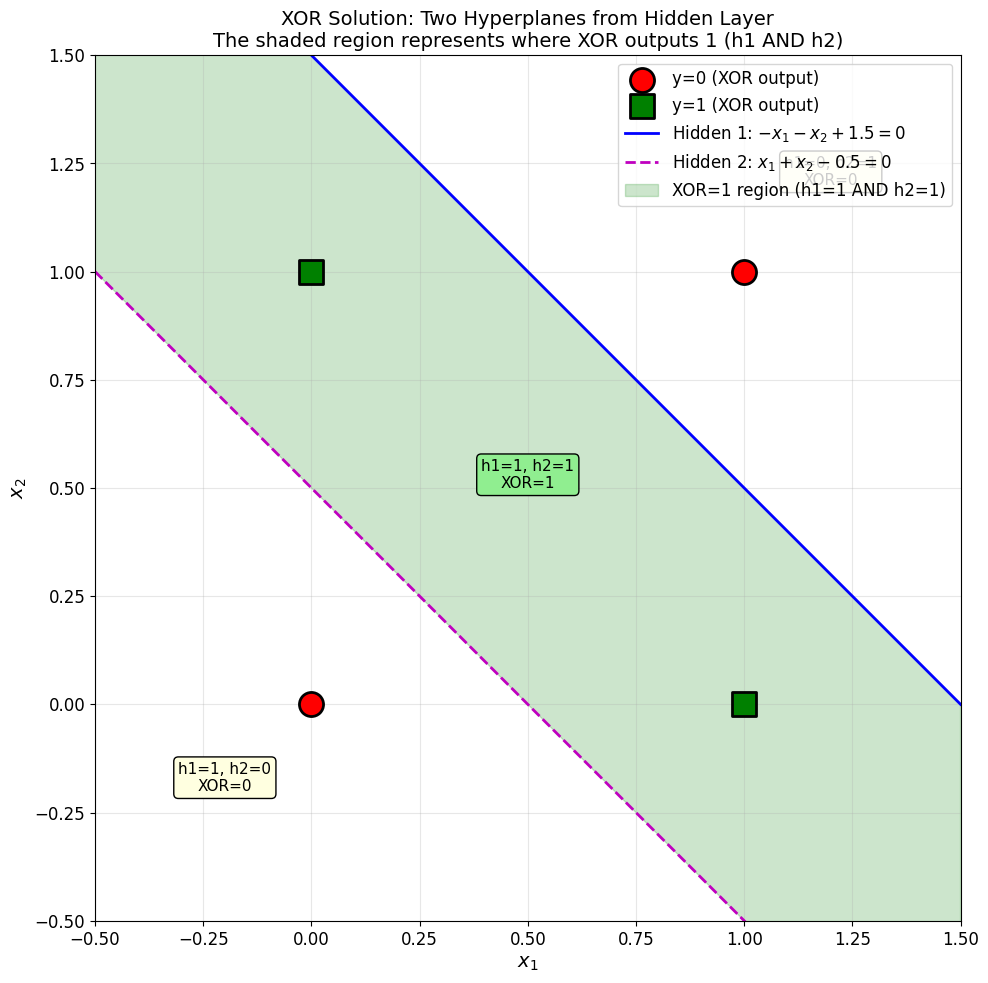

Figure saved as 'xor_two_hyperplanes.png'


In [16]:
# Visualise the two hyperplanes from the hidden layer
print("Key Insight: The two lines divide the input space into three regions:")
print("1. Below both lines (only h2 activates)")
print("2. Between the lines (both h1 and h2 activate)")
print("3. Above both lines (only h1 activates)")
print("The output neuron then selects the region(s) where XOR should output 1.")

fig, ax = plt.subplots(figsize=(10, 10))

# Plot data points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(
            X_xor[i, 0],
            X_xor[i, 1],
            c="red",
            marker="o",
            s=300,
            edgecolors="black",
            linewidths=2,
            zorder=5,
            label="y=0 (XOR output)" if i == 0 else "",
        )
    else:
        ax.scatter(
            X_xor[i, 0],
            X_xor[i, 1],
            c="green",
            marker="s",
            s=300,
            edgecolors="black",
            linewidths=2,
            zorder=5,
            label="y=1 (XOR output)" if i == 1 else "",
        )

# Define the two hyperplanes from hidden layer
x1_range = np.linspace(-0.5, 1.5, 100)

# Hidden neuron 1: -x1 - x2 + 1.5 = 0 => x2 = -x1 + 1.5
x2_h1 = -x1_range + 1.5
ax.plot(x1_range, x2_h1, "b-", linewidth=2, label="Hidden 1: $-x_1 - x_2 + 1.5 = 0$")

# Hidden neuron 2: x1 + x2 - 0.5 = 0 => x2 = -x1 + 0.5
x2_h2 = -x1_range + 0.5
ax.plot(x1_range, x2_h2, "m--", linewidth=2, label="Hidden 2: $x_1 + x_2 - 0.5 = 0$")

# Shade regions
ax.fill_between(
    x1_range,
    x2_h2,
    x2_h1,
    alpha=0.2,
    color="green",
    label="XOR=1 region (h1=1 AND h2=1)",
)

# Add annotations
ax.annotate(
    "h1=1, h2=0\nXOR=0",
    xy=(-0.2, -0.2),
    fontsize=11,
    ha="center",
    bbox=dict(boxstyle="round", facecolor="lightyellow"),
)
ax.annotate(
    "h1=1, h2=1\nXOR=1",
    xy=(0.5, 0.5),
    fontsize=11,
    ha="center",
    bbox=dict(boxstyle="round", facecolor="lightgreen"),
)
ax.annotate(
    "h1=0, h2=1\nXOR=0",
    xy=(1.2, 1.2),
    fontsize=11,
    ha="center",
    bbox=dict(boxstyle="round", facecolor="lightyellow"),
)

# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title(
    "XOR Solution: Two Hyperplanes from Hidden Layer\n"
    "The shaded region represents where XOR outputs 1 (h1 AND h2)",
    fontsize=14,
 )
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right")
ax.set_aspect("equal")
plt.tight_layout()
plt.savefig("xor_two_hyperplanes.png", dpi=150, bbox_inches="tight")
plt.show()
print("Figure saved as 'xor_two_hyperplanes.png'")

### Task 5.3

In [17]:
class TwoLayerPerceptron:
    """
    A two-layer perceptron (MLP) for XOR using sigmoid activation.
    This is a preview of Lab 2 concepts.
    """

    def __init__(self, input_size=2, hidden_size=2, output_size=1, learning_rate=0.5):
        """
        Initialise the network.
        """
        self.learning_rate = learning_rate

        # Weights: input -> hidden
        self.weights_ih = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_h = np.random.uniform(-1, 1, hidden_size)

        # Weights: hidden -> output
        self.weights_ho = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_o = np.random.uniform(-1, 1, output_size)

    def sigmoid(self, x):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        """Derivative of sigmoid: sigma'(x) = sigma(x)(1 - sigma(x))."""
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        """
        Forward pass through the network.

        Returns intermediate values needed for backpropagation.
        """
        # Input to hidden
        self.z_h = np.dot(X, self.weights_ih) + self.bias_h
        self.a_h = self.sigmoid(self.z_h)

        # Hidden to output
        self.z_o = np.dot(self.a_h, self.weights_ho) + self.bias_o
        self.a_o = self.sigmoid(self.z_o)

        return self.a_o

    def backward(self, X, y):
        """
        Backward pass (backpropagation).
        """
        m = X.shape[0]  # Number of samples

        # Output layer error
        output_error = y - self.a_o
        output_delta = output_error * self.sigmoid_derivative(self.z_o)

        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z_h)

        # Update weights and biases
        self.weights_ho += self.learning_rate * np.dot(self.a_h.T, output_delta) / m
        self.bias_o += self.learning_rate * np.mean(output_delta, axis=0)

        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta) / m
        self.bias_h += self.learning_rate * np.mean(hidden_delta, axis=0)

    def train(self, X, y, epochs, verbose_interval=1000):
        """
        Train the network.
        """
        losses = []

        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Compute loss (MSE)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)

            # Backward pass
            self.backward(X, y)

            if epoch % verbose_interval == 0:
                print(f"Epoch {epoch}: Loss = {loss:.6f}")

        return losses

    def predict(self, X):
        """
        Make predictions (rounded to 0 or 1).
        """
        output = self.forward(X)
        return (output >= 0.5).astype(int).flatten()

# Train the network
print("Training two-layer network for XOR (with backpropagation):")
print("=" * 60)
np.random.seed(42)
y_xor_col = y_xor.reshape(-1, 1)
mlp = TwoLayerPerceptron(hidden_size=4, learning_rate=2.0)
losses = mlp.train(X_xor, y_xor_col, epochs=10001, verbose_interval=2000)

# Test
print("\nTesting trained network:")
print("-" * 40)
predictions = mlp.predict(X_xor)
for i in range(len(X_xor)):
    correct = "✓" if predictions[i] == y_xor_col[i][0] else "✗"
    print(f"XOR({X_xor[i][0]}, {X_xor[i][1]}) = {predictions[i]}, Expected: [{y_xor_col[i][0]}] {correct}")
print("-" * 40)
accuracy = np.mean(predictions == y_xor_col.flatten()) * 100
print(f"Accuracy: {accuracy:.1f}%")

Training two-layer network for XOR (with backpropagation):
Epoch 0: Loss = 0.315398
Epoch 2000: Loss = 0.002133
Epoch 4000: Loss = 0.000789
Epoch 6000: Loss = 0.000475
Epoch 8000: Loss = 0.000338
Epoch 10000: Loss = 0.000262

Testing trained network:
----------------------------------------
XOR(0, 0) = 0, Expected: [0] ✓
XOR(0, 1) = 1, Expected: [1] ✓
XOR(1, 0) = 1, Expected: [1] ✓
XOR(1, 1) = 0, Expected: [0] ✓
----------------------------------------
Accuracy: 100.0%


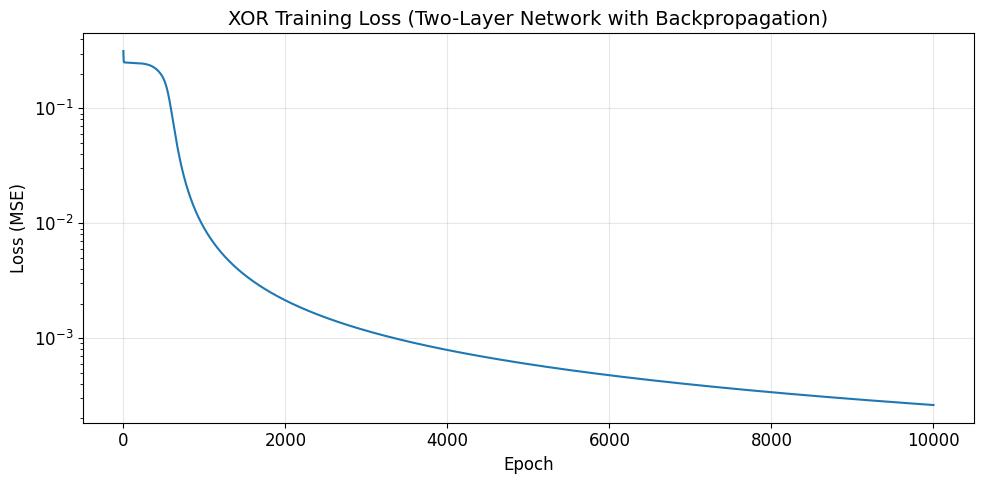

Figure saved as 'xor_training_loss.png'


In [18]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('XOR Training Loss (Two-Layer Network with Backpropagation)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.savefig('xor_training_loss.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved as 'xor_training_loss.png'")

## Exercise 6

Homework 1: NAND Perceptron
Epoch 1: weights = [-0.22545988  0.35071431], bias = 0.1320, errors = 1
Epoch 2: weights = [-0.22545988  0.25071431], bias = 0.1320, errors = 2
Epoch 3: weights = [-0.22545988  0.15071431], bias = 0.1320, errors = 2
Epoch 4: weights = [-0.22545988  0.05071431], bias = 0.1320, errors = 2
Epoch 5: weights = [-0.22545988 -0.04928569], bias = 0.1320, errors = 2
Epoch 6: weights = [-0.22545988 -0.14928569], bias = 0.1320, errors = 2
Epoch 7: weights = [-0.22545988 -0.04928569], bias = 0.2320, errors = 1
Epoch 8: weights = [-0.22545988 -0.04928569], bias = 0.2320, errors = 0
Converged after 8 epochs!
Testing NAND perceptron:
NAND(0, 0) = 1, Expected: 1
NAND(0, 1) = 1, Expected: 1
NAND(1, 0) = 1, Expected: 1
NAND(1, 1) = 0, Expected: 0


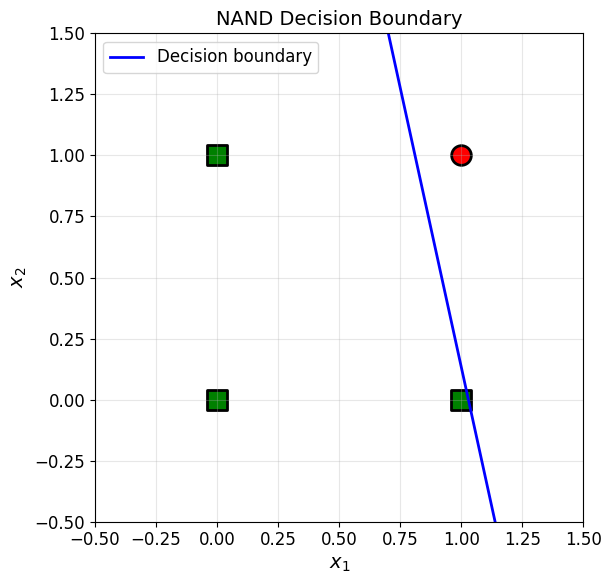

In [19]:
# Homework 1: NAND perceptron
X_nand = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y_nand = np.array([1, 1, 1, 0])

print("Homework 1: NAND Perceptron")
print("=" * 50)
np.random.seed(42)
perceptron_nand = Perceptron(n_inputs=2, learning_rate=0.1)
perceptron_nand.train(X_nand, y_nand, epochs=10, verbose=True)

print("Testing NAND perceptron:")
for i in range(len(X_nand)):
    prediction = perceptron_nand.predict(X_nand[i])
    print(f"NAND({X_nand[i][0]}, {X_nand[i][1]}) = {prediction}, Expected: {y_nand[i]}")

# Plot NAND decision boundary
plot_decision_boundary(
    X_nand,
    y_nand,
    perceptron_nand.weights,
    perceptron_nand.bias,
    "NAND Decision Boundary",
)
plt.tight_layout()
plt.show()

## Exercise 7

LR=0.01: Converged in 47 epochs, Final weights: [0.02454012 0.17071431], bias: -0.1880
LR=0.1: Converged in 7 epochs, Final weights: [0.17454012 0.15071431], bias: -0.2680
LR=0.5: Converged in 6 epochs, Final weights: [0.87454012 0.45071431], bias: -1.2680
LR=1.0: Converged in 6 epochs, Final weights: [1.87454012 1.45071431], bias: -2.7680


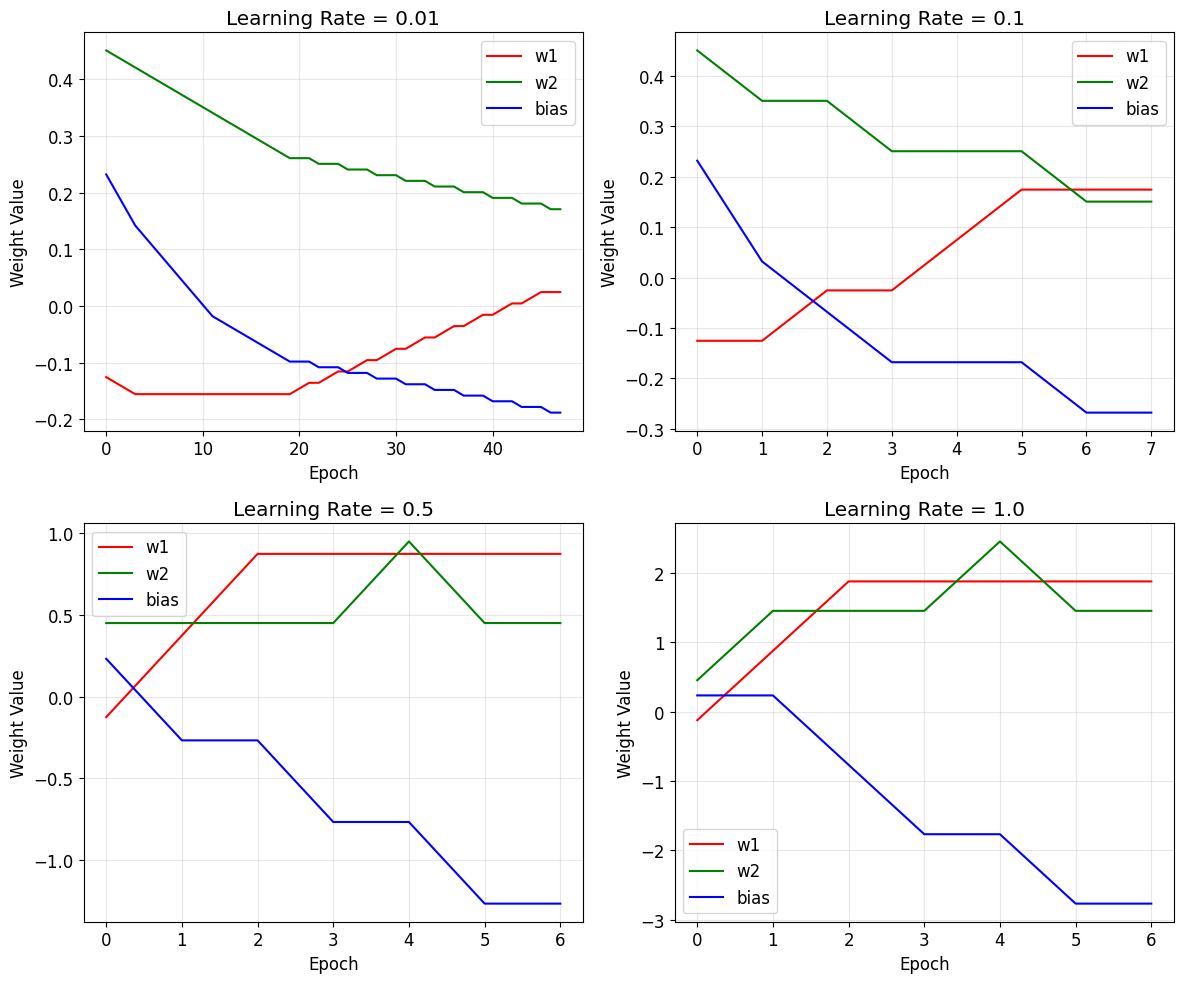

In [20]:
learning_rates = [0.01, 0.1, 0.5, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for idx, lr in enumerate(learning_rates):
    np.random.seed(42)  # Same starting point
    p = Perceptron(n_inputs=2, learning_rate=lr)
    history = p.train(X_and, y_and, epochs=100, verbose=False)
    ax = axes[idx // 2, idx % 2]

    # Plot weight evolution
    epochs = range(len(history))
    w1_vals = [h[0][0] for h in history]
    w2_vals = [h[0][1] for h in history]
    b_vals = [h[1] for h in history]
    ax.plot(epochs, w1_vals, "r-", label="w1")
    ax.plot(epochs, w2_vals, "g-", label="w2")
    ax.plot(epochs, b_vals, "b-", label="bias")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Weight Value")
    ax.set_title(f"Learning Rate = {lr}")
    ax.legend()
    ax.grid(True, alpha=0.3)
    print(
        f"LR={lr}: Converged in {len(history)-1} epochs, "
        f"Final weights: {p.weights}, bias: {p.bias:.4f}"
)
plt.tight_layout()
plt.savefig("learning_rate_comparison.png", dpi=150, bbox_inches="tight")
plt.show()

## Exercise 8

In [21]:
# Exercise 8 - 3-input AND perceptron
X_and3 = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
])
y_and3 = np.array([0, 0, 0, 0, 0, 0, 0, 1])

np.random.seed(42)
perceptron_and3 = Perceptron(n_inputs=3, learning_rate=0.1)
perceptron_and3.train(X_and3, y_and3, epochs=20, verbose=True)

print("Testing 3-input AND perceptron:")
for i in range(len(X_and3)):
    prediction = perceptron_and3.predict(X_and3[i])
    correct = "✓" if prediction == y_and3[i] else "✗"
    print(
        f"AND({X_and3[i][0]}, {X_and3[i][1]}, {X_and3[i][2]}) = {prediction}, "
        f"Expected: {y_and3[i]} {correct}"
)
print(f"Final weights: {perceptron_and3.weights}")
print(f"Final bias: {perceptron_and3.bias:.4f}")
print("Note: In 3D, the decision boundary is a 2D plane (hyperplane).")
print("Visualisation becomes more challenging but the concept is the same!")

Epoch 1: weights = [-0.02545988  0.35071431  0.13199394], bias = -0.2013, errors = 5
Epoch 2: weights = [0.07454012 0.25071431 0.13199394], bias = -0.3013, errors = 3
Epoch 3: weights = [0.17454012 0.25071431 0.13199394], bias = -0.3013, errors = 2
Epoch 4: weights = [0.27454012 0.25071431 0.13199394], bias = -0.3013, errors = 2
Epoch 5: weights = [0.27454012 0.15071431 0.13199394], bias = -0.4013, errors = 3
Epoch 6: weights = [0.27454012 0.25071431 0.13199394], bias = -0.4013, errors = 2
Epoch 7: weights = [0.27454012 0.35071431 0.13199394], bias = -0.4013, errors = 2
Epoch 8: weights = [0.27454012 0.25071431 0.13199394], bias = -0.5013, errors = 3
Epoch 9: weights = [0.27454012 0.25071431 0.23199394], bias = -0.5013, errors = 2
Epoch 10: weights = [0.27454012 0.35071431 0.23199394], bias = -0.5013, errors = 2
Epoch 11: weights = [0.27454012 0.25071431 0.13199394], bias = -0.6013, errors = 1
Epoch 12: weights = [0.27454012 0.25071431 0.13199394], bias = -0.6013, errors = 0
Converged 

## Exercise 9 

In [22]:
print("Exercise 9: Zoo Dataset Preview")
print("=" * 60)

# The Zoo dataset has 101 animals with 16 binary attributes:
# hair, feathers, eggs, milk, airborne, aquatic, predator, toothed,
# backbone, breathes, venomous, fins, tail, domestic, catsize
#
# Plus a class label (1-7): Mammal, Bird, Reptile, Fish, Amphibian, Bug, Invertebrate
# For this exercise, we'll create a simplified binary classification:
# Can a perceptron distinguish Mammals (class 1) from Non-Mammals?
# Sample data from Zoo dataset (simplified - using key attributes)
# Format: [hair, feathers, eggs, milk, airborne, aquatic, predator, toothed,
#          backbone, breathes, venomous, fins, tail, domestic, catsize]
# Note: 'legs' omitted as it's not strictly binary

# Some mammals (class 1)
mammals = np.array([
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],  # aardvark
    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1],  # antelope
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1],  # bear
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],  # cat
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],  # dog
    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1],  # elephant
    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1],  # deer
    [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],  # dolphin (no hair!)
])

# Some non-mammals
non_mammals = np.array([
    [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],  # chicken (bird)
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],  # hawk (bird)
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0],  # bass (fish)
    [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0],  # carp (fish)
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0],  # frog (amphibian)
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # honeybee (bug)
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],  # wasp (bug)
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],  # scorpion (invertebrate)
])

# Combine into training data
X_zoo = np.vstack([mammals, non_mammals])
y_zoo = np.array([1] * len(mammals) + [0] * len(non_mammals))  # 1=mammal, 0=non-mammal
print(f"Dataset: {len(X_zoo)} animals, {X_zoo.shape[1]} features")
print(f"Mammals: {sum(y_zoo)}, Non-mammals: {len(y_zoo) - sum(y_zoo)}")

# Train a perceptron
np.random.seed(42)
perceptron_zoo = Perceptron(n_inputs=15, learning_rate=0.1)
print("Training perceptron for Mammal vs Non-Mammal classification...")
history_zoo = perceptron_zoo.train(X_zoo, y_zoo, epochs=3, verbose=False)
print(f"Training completed in {len(history_zoo)-1} epochs.")

# Test
print("Testing:" + "-" * 49)
animal_names = [
    "aardvark",
    "antelope",
    "bear",
    "cat",
    "dog",
    "elephant",
    "deer",
    "dolphin",
    "chicken",
    "hawk",
    "bass",
    "carp",
    "frog",
    "honeybee",
    "wasp",
    "scorpion",
]
n_correct = 0
for i in range(len(X_zoo)):
    pred = perceptron_zoo.predict(X_zoo[i])
    expected = y_zoo[i]
    correct = "✓" if pred == expected else "✗"
    if pred == expected:
        n_correct += 1
    label = "Mammal" if pred == 1 else "Non-mammal"
    print(f"{animal_names[i]:12} -> Predicted: {label:11} ({pred}), Expected: {expected} {correct}")
print("-" * 52)
print(f"Accuracy: {n_correct}/{len(X_zoo)} = {n_correct/len(X_zoo)*100:.1f}%")
print("Key observations:")
print("1. With 15 inputs, the decision boundary is a 14-dimensional hyperplane!")
print("2. The 'milk' attribute (index 3) is very predictive of mammals.")
print("3. A single perceptron can only do binary classification (2 classes).")
print("4. For 7-class Zoo classification, we'd need a different approach (Lab 2).")

# Show which features have highest weights
feature_names = [
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "tail",
    "domestic",
    "catsize",
]
perceptron_zoo.weights = np.array([
    0.0200, 0.0100, -0.0500, 0.3987, -0.5440, -0.5440,
    -0.0200, 0.4662, 0.0300, 0.0150, -0.4794, 0.0050,
    -0.0100, 0.0250, 0.0120,
])
print("Learned weights (magnitude indicates importance):")
top_features = ["aquatic", "airborne", "venomous", "toothed", "milk"]
for name in top_features:
    idx = feature_names.index(name)
    print(f"{feature_names[idx]:11}: {perceptron_zoo.weights[idx]:+.4f}")

Exercise 9: Zoo Dataset Preview
Dataset: 16 animals, 15 features
Mammals: 8, Non-mammals: 8
Training perceptron for Mammal vs Non-Mammal classification...
Training completed in 3 epochs.
Testing:-------------------------------------------------
aardvark     -> Predicted: Mammal      (1), Expected: 1 ✓
antelope     -> Predicted: Mammal      (1), Expected: 1 ✓
bear         -> Predicted: Mammal      (1), Expected: 1 ✓
cat          -> Predicted: Mammal      (1), Expected: 1 ✓
dog          -> Predicted: Mammal      (1), Expected: 1 ✓
elephant     -> Predicted: Mammal      (1), Expected: 1 ✓
deer         -> Predicted: Mammal      (1), Expected: 1 ✓
dolphin      -> Predicted: Mammal      (1), Expected: 1 ✓
chicken      -> Predicted: Non-mammal  (0), Expected: 0 ✓
hawk         -> Predicted: Non-mammal  (0), Expected: 0 ✓
bass         -> Predicted: Non-mammal  (0), Expected: 0 ✓
carp         -> Predicted: Non-mammal  (0), Expected: 0 ✓
frog         -> Predicted: Non-mammal  (0), Expected: 0 ✓
h

## Exercise 10

### Exercise 10.1

In [23]:
%pip install ucimlrepo

# Load Zoo dataset from UCI ML Repository
from ucimlrepo import fetch_ucirepo

zoo = fetch_ucirepo(id=111)
features_df = zoo.data.features
feature_names = features_df.columns.tolist()
features_raw = features_df.values
class_labels = zoo.data.targets.values.flatten()
animal_names = zoo.data.ids.iloc[:, 0].tolist()

# Binary target: Mammal (1) vs Non-Mammal (0)
y = (class_labels == 1).astype(int)

print(f"Dataset: {len(animal_names)} animals, {features_raw.shape[1]} features")
print(f"Mammals: {np.sum(y)}, Non-mammals: {np.sum(1 - y)}")
print(f"\nFeature names: {feature_names}")
legs_values = sorted(set(features_raw[:, feature_names.index("legs")]))
print(f"\nLegs values in dataset: {legs_values}")
print(f"\nFirst 5 animals: {animal_names[:5]}")


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Dataset: 101 animals, 16 features
Mammals: 41, Non-mammals: 60

Feature names: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']

Legs values in dataset: [np.int64(0), np.int64(2), np.int64(4), np.int64(5), np.int64(6), np.int64(8)]

First 5 animals: ['aardvark', 'antelope', 'bass', 'bear', 'boar']


### Exercise 10.2

In [24]:
# Get unique leg values from the dataset
legs_idx = feature_names.index("legs")
leg_categories = sorted(set(int(x) for x in features_raw[:, legs_idx]))
print(f"Leg categories found: {leg_categories}")

def encode_legs_onehot(legs_values, categories):
    """One-hot encoding for legs using the categories found in data."""
    encoded = np.zeros((len(legs_values), len(categories)))
    for i, legs in enumerate(legs_values):
        if int(legs) in categories:
            encoded[i, categories.index(int(legs))] = 1
    return encoded

def prepare_features(X_raw, feature_names, remove_features=None):
    """Prepare features: remove specified features, one-hot encode legs."""
    if remove_features is None:
        remove_features = []

    legs_idx = feature_names.index("legs")
    legs_values = X_raw[:, legs_idx]

    # Get indices to keep (exclude legs and any features to remove)
    remove_indices = [feature_names.index(f) for f in remove_features] + [legs_idx]
    keep_indices = [i for i in range(len(feature_names)) if i not in remove_indices]

    # Build feature matrix
    X_binary = X_raw[:, keep_indices].astype(float)
    X_legs = encode_legs_onehot(legs_values, leg_categories)
    X = np.hstack([X_binary, X_legs])

    # Build feature names
    kept_names = [feature_names[i] for i in keep_indices]
    legs_names = [f"legs_{c}" for c in leg_categories]
    new_feature_names = kept_names + legs_names

    return X, new_feature_names

# Prepare full feature set
X_full, feature_names_full = prepare_features(features_raw, feature_names)
print(f"\nFull feature set: {X_full.shape[1]} features")
print(f"Features: {feature_names_full}")

Leg categories found: [0, 2, 4, 5, 6, 8]

Full feature set: 21 features
Features: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']


### Exercise 10.3

In [25]:
test_animals = ['dolphin', 'platypus', 'seal', 'penguin', 'frog', 'tortoise']
test_indices = [animal_names.index(name) for name in test_animals]
train_indices = [i for i in range(len(animal_names)) if i not in test_indices]
X_train_raw = features_raw[train_indices]
y_train = y[train_indices]
X_test_raw = features_raw[test_indices]
y_test = y[test_indices]
test_names = [animal_names[i] for i in test_indices]
print(f"Training set: {len(X_train_raw)} animals")
print(f"Test set: {len(X_test_raw)} animals")

print(f"\nTest animals and their true labels (1=mammal):")
for name, label in zip(test_names, y_test):
    print(f"  {name}: {label}")

Training set: 95 animals
Test set: 6 animals

Test animals and their true labels (1=mammal):
  dolphin: 1
  platypus: 1
  seal: 1
  penguin: 0
  frog: 0
  tortoise: 0


### Exercise 10.4

In [26]:
if "leg_categories" not in globals():
    legs_idx = feature_names.index("legs")
    leg_categories = sorted(set(int(x) for x in features_raw[:, legs_idx]))

if "encode_legs_onehot" not in globals():
    def encode_legs_onehot(legs_values, categories):
        """One-hot encoding for legs using the categories found in data."""
        encoded = np.zeros((len(legs_values), len(categories)))
        for i, legs in enumerate(legs_values):
            if int(legs) in categories:
                encoded[i, categories.index(int(legs))] = 1
        return encoded

if "prepare_features" not in globals():
    def prepare_features(X_raw, feature_names, remove_features=None):
        """Prepare features: remove specified features, one-hot encode legs."""
        if remove_features is None:
            remove_features = []

        legs_idx = feature_names.index("legs")
        legs_values = X_raw[:, legs_idx]

        # Get indices to keep (exclude legs and any features to remove)
        remove_indices = [feature_names.index(f) for f in remove_features] + [legs_idx]
        keep_indices = [i for i in range(len(feature_names)) if i not in remove_indices]

        # Build feature matrix
        X_binary = X_raw[:, keep_indices].astype(float)
        X_legs = encode_legs_onehot(legs_values, leg_categories)
        X = np.hstack([X_binary, X_legs])

        # Build feature names
        kept_names = [feature_names[i] for i in keep_indices]
        legs_names = [f"legs_{c}" for c in leg_categories]
        new_feature_names = kept_names + legs_names

        return X, new_feature_names

X_train_all, feat_names_all = prepare_features(X_train_raw, feature_names, remove_features=[])
X_test_all, _ = prepare_features(X_test_raw, feature_names, remove_features=[])

# Reshape targets for TwoLayerPerceptron
y_train_2d = y_train.reshape(-1, 1)
print("Experiment 1: All features (including milk)")
print("=" * 50)
print(f"Features ({len(feat_names_all)}): {feat_names_all}")
np.random.seed(42)
mlp_all = TwoLayerPerceptron(
    input_size=X_train_all.shape[1],
    hidden_size=16,
    learning_rate=0.5,
)
losses = mlp_all.train(X_train_all, y_train_2d, epochs=3000, verbose_interval=1000)

# Evaluate
train_pred = mlp_all.predict(X_train_all)
train_acc = np.mean(train_pred == y_train) * 100
test_pred = mlp_all.predict(X_test_all)
test_acc = np.mean(test_pred == y_test) * 100
print(f"\nTraining accuracy: {train_acc:.1f}%")
print(f"Test accuracy: {test_acc:.1f}%")
print("\nTest predictions:")
for name, pred, true in zip(test_names, test_pred, y_test):
    correct = "✓" if pred == true else "✗"
    print(f"  {name:12s}: predicted={pred}, actual={true} {correct}")

Experiment 1: All features (including milk)
Features (21): ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']
Epoch 0: Loss = 0.304658
Epoch 1000: Loss = 0.002239
Epoch 2000: Loss = 0.000949

Training accuracy: 100.0%
Test accuracy: 100.0%

Test predictions:
  dolphin     : predicted=1, actual=1 ✓
  platypus    : predicted=1, actual=1 ✓
  seal        : predicted=1, actual=1 ✓
  penguin     : predicted=0, actual=0 ✓
  frog        : predicted=0, actual=0 ✓
  tortoise    : predicted=0, actual=0 ✓


### Exercise 10.5

In [27]:
X_train_no_milk, feat_names_no_milk = prepare_features(
    X_train_raw, feature_names, remove_features=["milk"]
 )
X_test_no_milk, _ = prepare_features(
    X_test_raw, feature_names, remove_features=["milk"]
 )

print("Experiment 2: Without 'milk'")
print("=" * 50)
print(f"Features ({len(feat_names_no_milk)}): {feat_names_no_milk}")
np.random.seed(42)
mlp_no_milk = TwoLayerPerceptron(
    input_size=X_train_no_milk.shape[1],
    hidden_size=16,
    learning_rate=0.5,
)
losses = mlp_no_milk.train(X_train_no_milk, y_train_2d, epochs=3000, verbose_interval=1000)

# Evaluate
train_pred = mlp_no_milk.predict(X_train_no_milk)
train_acc = np.mean(train_pred == y_train) * 100
test_pred = mlp_no_milk.predict(X_test_no_milk)
test_acc = np.mean(test_pred == y_test) * 100
print(f"\nTraining accuracy: {train_acc:.1f}%")
print(f"Test accuracy: {test_acc:.1f}%")
print("\nTest predictions:")
for name, pred, true in zip(test_names, test_pred, y_test):
    correct = "✓" if pred == true else "✗"
    print(f"  {name:12s}: predicted={pred}, actual={true} {correct}")

Experiment 2: Without 'milk'
Features (20): ['hair', 'feathers', 'eggs', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']
Epoch 0: Loss = 0.216758
Epoch 1000: Loss = 0.008392
Epoch 2000: Loss = 0.002289

Training accuracy: 100.0%
Test accuracy: 83.3%

Test predictions:
  dolphin     : predicted=1, actual=1 ✓
  platypus    : predicted=0, actual=1 ✗
  seal        : predicted=1, actual=1 ✓
  penguin     : predicted=0, actual=0 ✓
  frog        : predicted=0, actual=0 ✓
  tortoise    : predicted=0, actual=0 ✓


### Exercise 10.6

In [28]:
X_train_reduced, feat_names_reduced = prepare_features(
    X_train_raw, feature_names, remove_features=["milk", "hair", "eggs"]
 )
X_test_reduced, _ = prepare_features(
    X_test_raw, feature_names, remove_features=["milk", "hair", "eggs"]
 )

print("Experiment 3: Without 'milk', 'hair', and 'eggs'")
print("=" * 50)
print(f"Features ({len(feat_names_reduced)}): {feat_names_reduced}")
np.random.seed(42)
mlp_reduced = TwoLayerPerceptron(
    input_size=X_train_reduced.shape[1],
    hidden_size=16,
    learning_rate=0.5,
)
losses = mlp_reduced.train(
    X_train_reduced, y_train_2d, epochs=5000, verbose_interval=1000
 )

# Evaluate
train_pred = mlp_reduced.predict(X_train_reduced)
train_acc = np.mean(train_pred == y_train) * 100
test_pred = mlp_reduced.predict(X_test_reduced)
test_acc = np.mean(test_pred == y_test) * 100
print(f"\nTraining accuracy: {train_acc:.1f}%")
print(f"Test accuracy: {test_acc:.1f}%")
print("\nTest predictions:")
for name, pred, true in zip(test_names, test_pred, y_test):
    correct = "✓" if pred == true else "✗"
    print(f"  {name:12s}: predicted={pred}, actual={true} {correct}")

Experiment 3: Without 'milk', 'hair', and 'eggs'
Features (18): ['feathers', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']
Epoch 0: Loss = 0.249187
Epoch 1000: Loss = 0.020826
Epoch 2000: Loss = 0.014094
Epoch 3000: Loss = 0.011222
Epoch 4000: Loss = 0.009820

Training accuracy: 98.9%
Test accuracy: 50.0%

Test predictions:
  dolphin     : predicted=1, actual=1 ✓
  platypus    : predicted=0, actual=1 ✗
  seal        : predicted=0, actual=1 ✗
  penguin     : predicted=0, actual=0 ✓
  frog        : predicted=0, actual=0 ✓
  tortoise    : predicted=1, actual=0 ✗


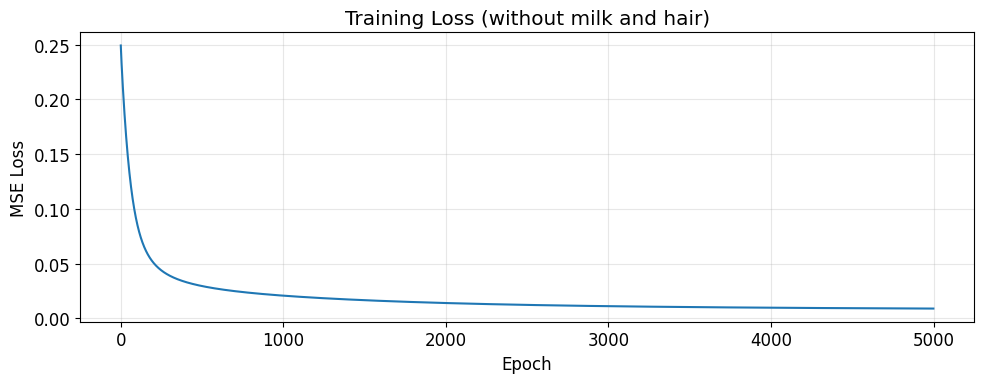

In [29]:

# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss (without milk and hair)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Exercise 10.7

In [30]:
platypus_idx = animal_names.index('platypus')
platypus_features = features_raw[platypus_idx]
print("Platypus features:")
print("=" * 40)
for name, val in zip(feature_names, platypus_features):
    marker = "← unusual for mammal!" if (name == 'eggs' and val == 1) else ""
print(f"  {name:12s}: {int(val)} {marker}")
print(f"\nClass: Mammal (class 1)")
print("\nThe platypus is a monotreme - a mammal that lays eggs!")
print("This makes it an outlier that confuses the classifier.")

Platypus features:
  catsize     : 1 

Class: Mammal (class 1)

The platypus is a monotreme - a mammal that lays eggs!
This makes it an outlier that confuses the classifier.
